In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import random

# Lists of indices for normal and anomaly runs
normal = [12, 29, 45, 56, 63, 129, 137, 152, 157, 176, 178, 210, 216, 234, 246, 263, 276, 277, 284, 286, 296, 298, 315, 322, 335, 356, 397, 406, 443, 467, 484, 541, 552]
anomaly = [37, 53, 68, 82, 91, 99, 103, 179, 195, 197, 207, 237, 247, 269, 288, 308, 345, 369, 396, 431, 436, 441, 472, 513, 546, 548]

In [2]:
def create_torch_dataset():
    """
    Creates a PyTorch dataset from CSV files.
    Each CSV file represents a different run with columns 'Input Voltage', 'Output Voltage', 'Tachometer'.
    :return: Tensor representing the dataset.
    """
    all_data = []
    columns = ['Input Voltage', 'Output Voltage', 'Tachometer']
    num_rows = 122824  # Number of rows to read from each CSV
    for run in range(1, 561):
        temp_df = pd.read_csv(f'PHM09_competition_1/Run_{run}.csv', names=columns, nrows=num_rows)
        temp_tensor = torch.tensor(temp_df.values, dtype=torch.float32)
        all_data.append(temp_tensor)
    
    all_data_tensor = torch.stack(all_data, dim=0)
    return all_data_tensor

data = create_torch_dataset()
print(f'Dataset Shape: {data.shape}')

Dataset Shape: torch.Size([560, 122824, 3])


In [3]:
def tensor_to_df(data, index=None):
    """
    Converts a tensor from the dataset to a pandas DataFrame.
    :param data: The complete dataset tensor.
    :param index: Index of the run to be converted. If None, selects a random index.
    :return: DataFrame of the selected run.
    """
    if index is None:
        index = random.randint(0, data.size(0) - 1) 
    tensor_data = data[index]
    numpy_data = tensor_data.numpy()
    columns = ['Input Voltage', 'Output Voltage', 'Tachometer']
    return pd.DataFrame(numpy_data, columns=columns)

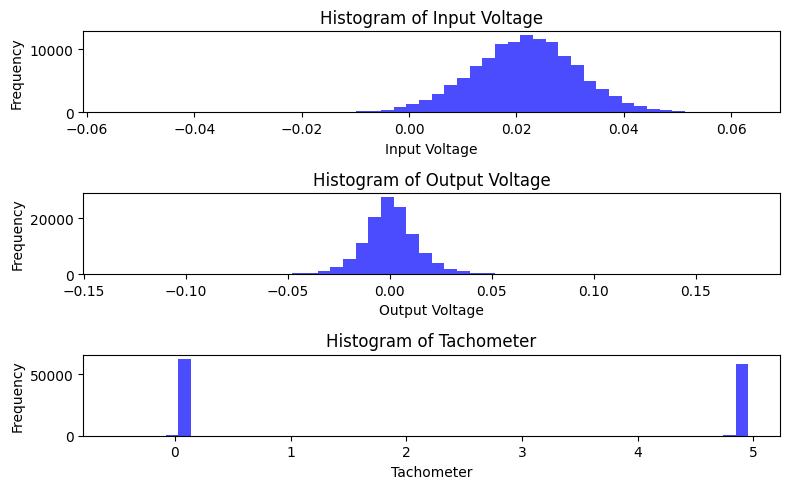

In [15]:
def plot_histograms(data, index=None):
    """
    Plots histograms for each column of a specified or randomly selected run.
    :param data: Tensor containing all runs data.
    :param index: Index of the run to plot. If None, selects a random run.
    """
    if index is None:
        index = random.randint(0, data.size(0) - 1)
    
    selected_data = data[index]

    fig, axes = plt.subplots(3, 1, figsize=(8, 5))
    columns = ['Input Voltage', 'Output Voltage', 'Tachometer']
    for i, col in enumerate(columns):
        column_data = selected_data[:, i].flatten()
        axes[i].hist(column_data, bins=50, color='blue', alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_histograms(data, 101)

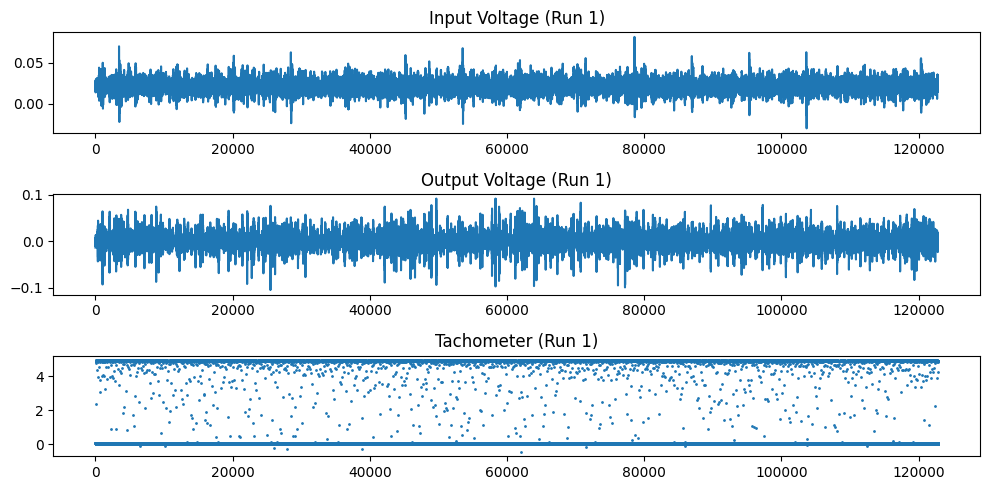

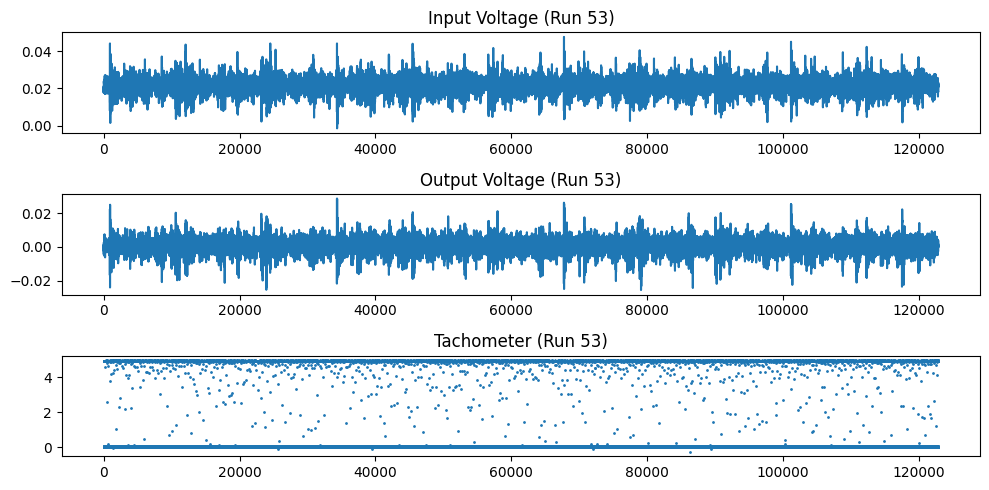

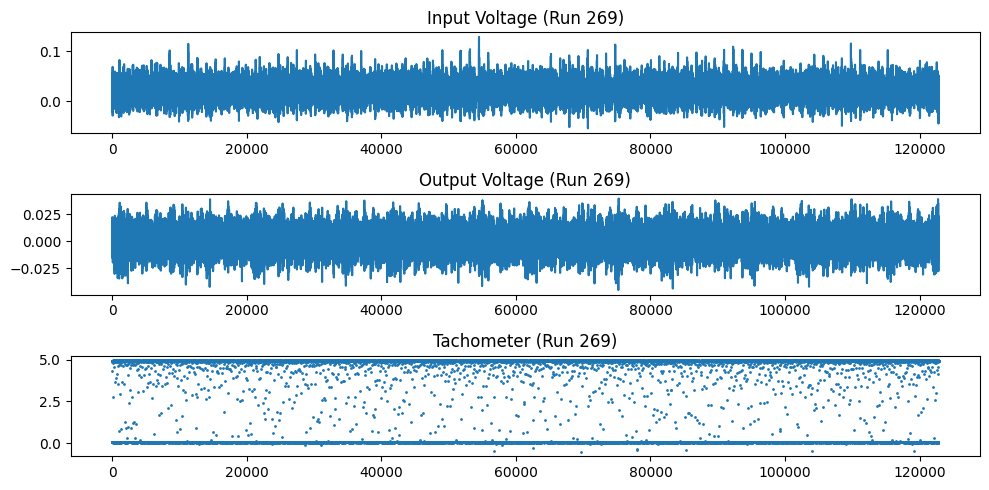

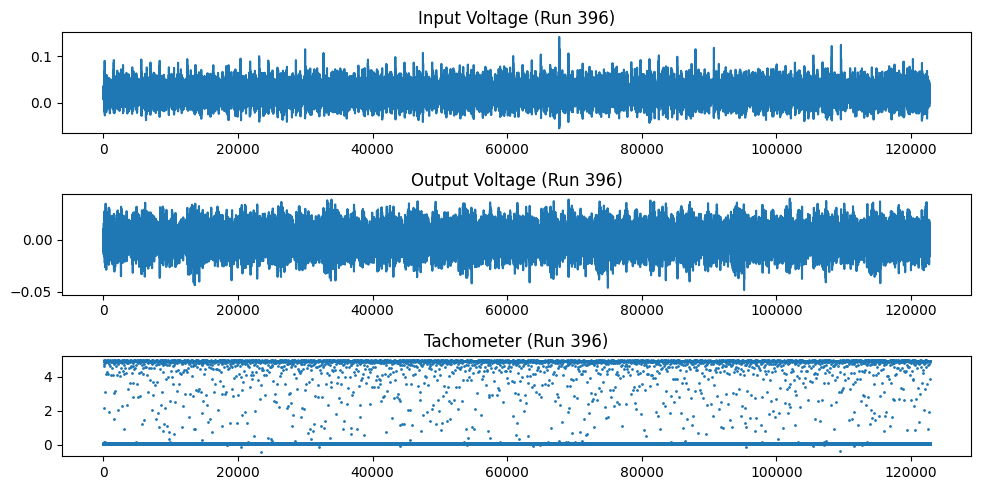

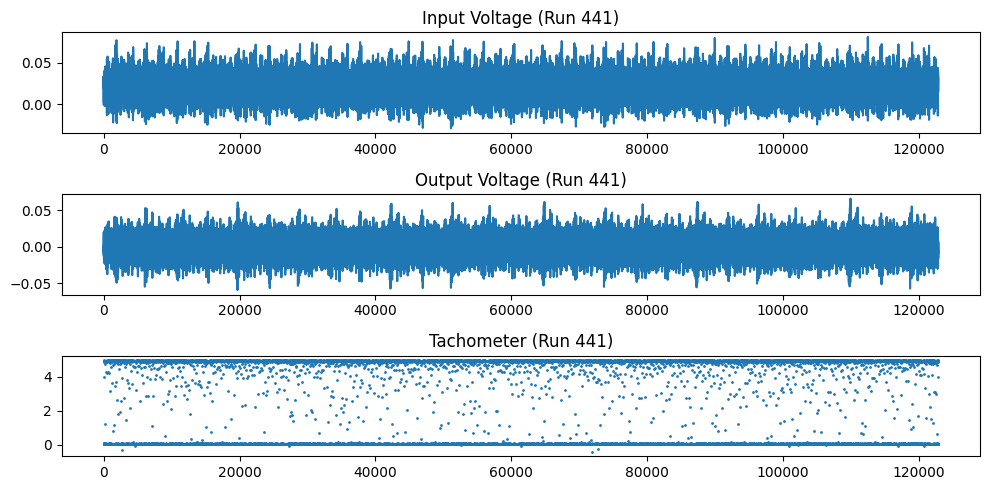

In [7]:
def plot_time_series(data, idx_lst=None, size=1):
    """
    Creates line plots for each column of specific or randomly selected runs.
    :param data: Tensor containing all runs data.
    :param idx_lst: List of specific indexes. If None, random indexes will be generated.
    :param size: Number of plots to create.
    """
    if idx_lst is None:
        idx_lst = [random.randint(1, 560) for _ in range(size)]
        
    for random_index in idx_lst:
        df = tensor_to_df(data, random_index)  
        fig, axes = plt.subplots(3, 1, figsize=(10, 5))
        axes[0].plot(df['Input Voltage'])
        axes[0].set_title(f'Input Voltage (Run {random_index})')
        axes[1].plot(df['Output Voltage'])
        axes[1].set_title(f'Output Voltage (Run {random_index})')
        axes[2].scatter(range(len(df['Tachometer'])), df['Tachometer'], s=1)  # s=1 sets the marker size to 1
        axes[2].set_title(f'Tachometer (Run {random_index})')

        plt.tight_layout()
        plt.savefig(f'img/p{random_index}.png')
        plt.show()

anomaly_common = [1,53,269,396,441]
plot_time_series(data, anomaly_common)


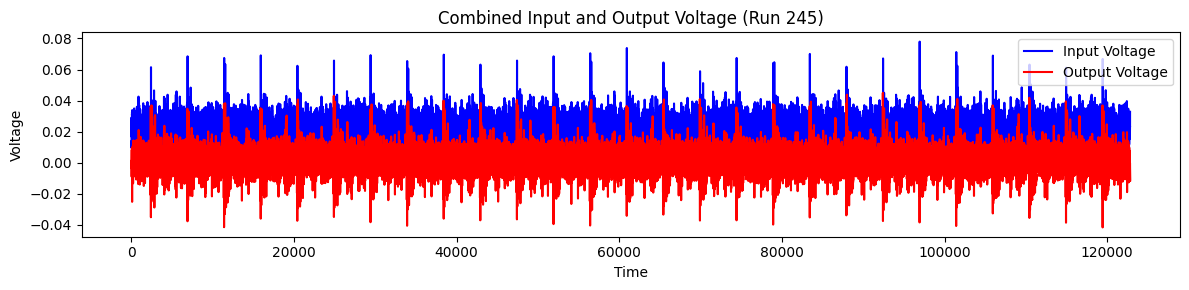

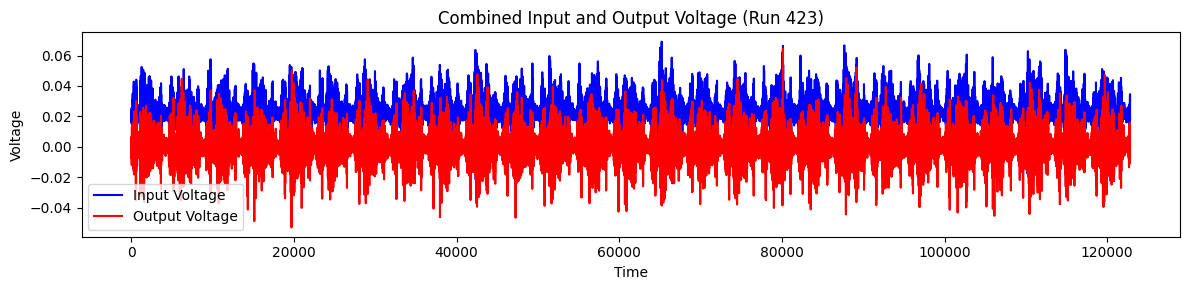

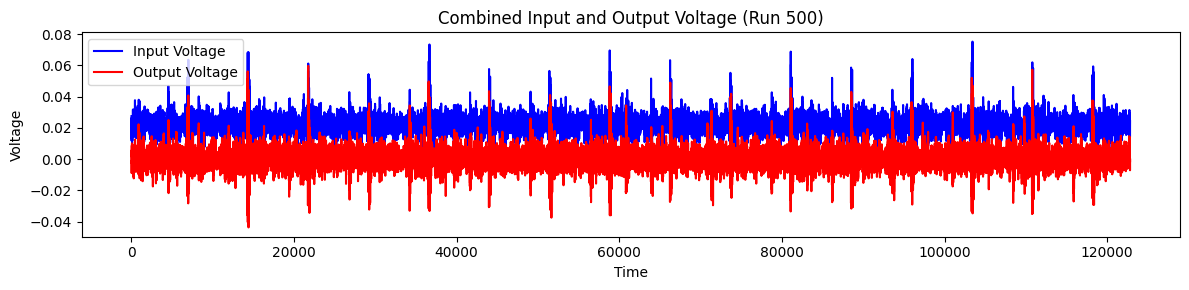

In [22]:
def combined_voltage_plot(data, size=1):
    """
    Creates a plot that combines 'Input Voltage' and 'Output Voltage' for random data samples.
    :param data: Tensor containing all runs data.
    :param size: Number of plots to create.
    """
    for _ in range(size):
        random_index = random.randint(0, data.size(0) - 1)
        df = tensor_to_df(data, random_index)
        plt.figure(figsize=(12, 3))
        plt.plot(df['Input Voltage'], label='Input Voltage', color='blue')
        plt.plot(df['Output Voltage'], label='Output Voltage', color='red')
        plt.title(f'Combined Input and Output Voltage (Run {random_index})')
        plt.xlabel('Time')
        plt.ylabel('Voltage')
        plt.legend()
        plt.tight_layout()
        plt.show()

combined_voltage_plot(data, size=3)